In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dt = pd.read_csv("alzheimer.csv")

In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB


In [4]:
dt.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [5]:
dt.isnull().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [6]:
dt.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [7]:
# Eksik değerleri sütun bazında ortalama değer ile doldur
dt['SES'].fillna(dt['SES'].mean(), inplace=True)
dt['MMSE'].fillna(dt['MMSE'].mean(), inplace=True)

In [8]:
dt.isnull().sum()

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

In [9]:
dt.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,2.460452,22.0,0.5,1698,0.701,1.034


In [10]:
dt.nunique() 

Group      3
M/F        2
Age       39
EDUC      12
SES        6
MMSE      19
CDR        4
eTIV     286
nWBV     136
ASF      265
dtype: int64

In [11]:
import matplotlib.pyplot as plt

C:\Users\cemil\anaconda3\envs\me\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


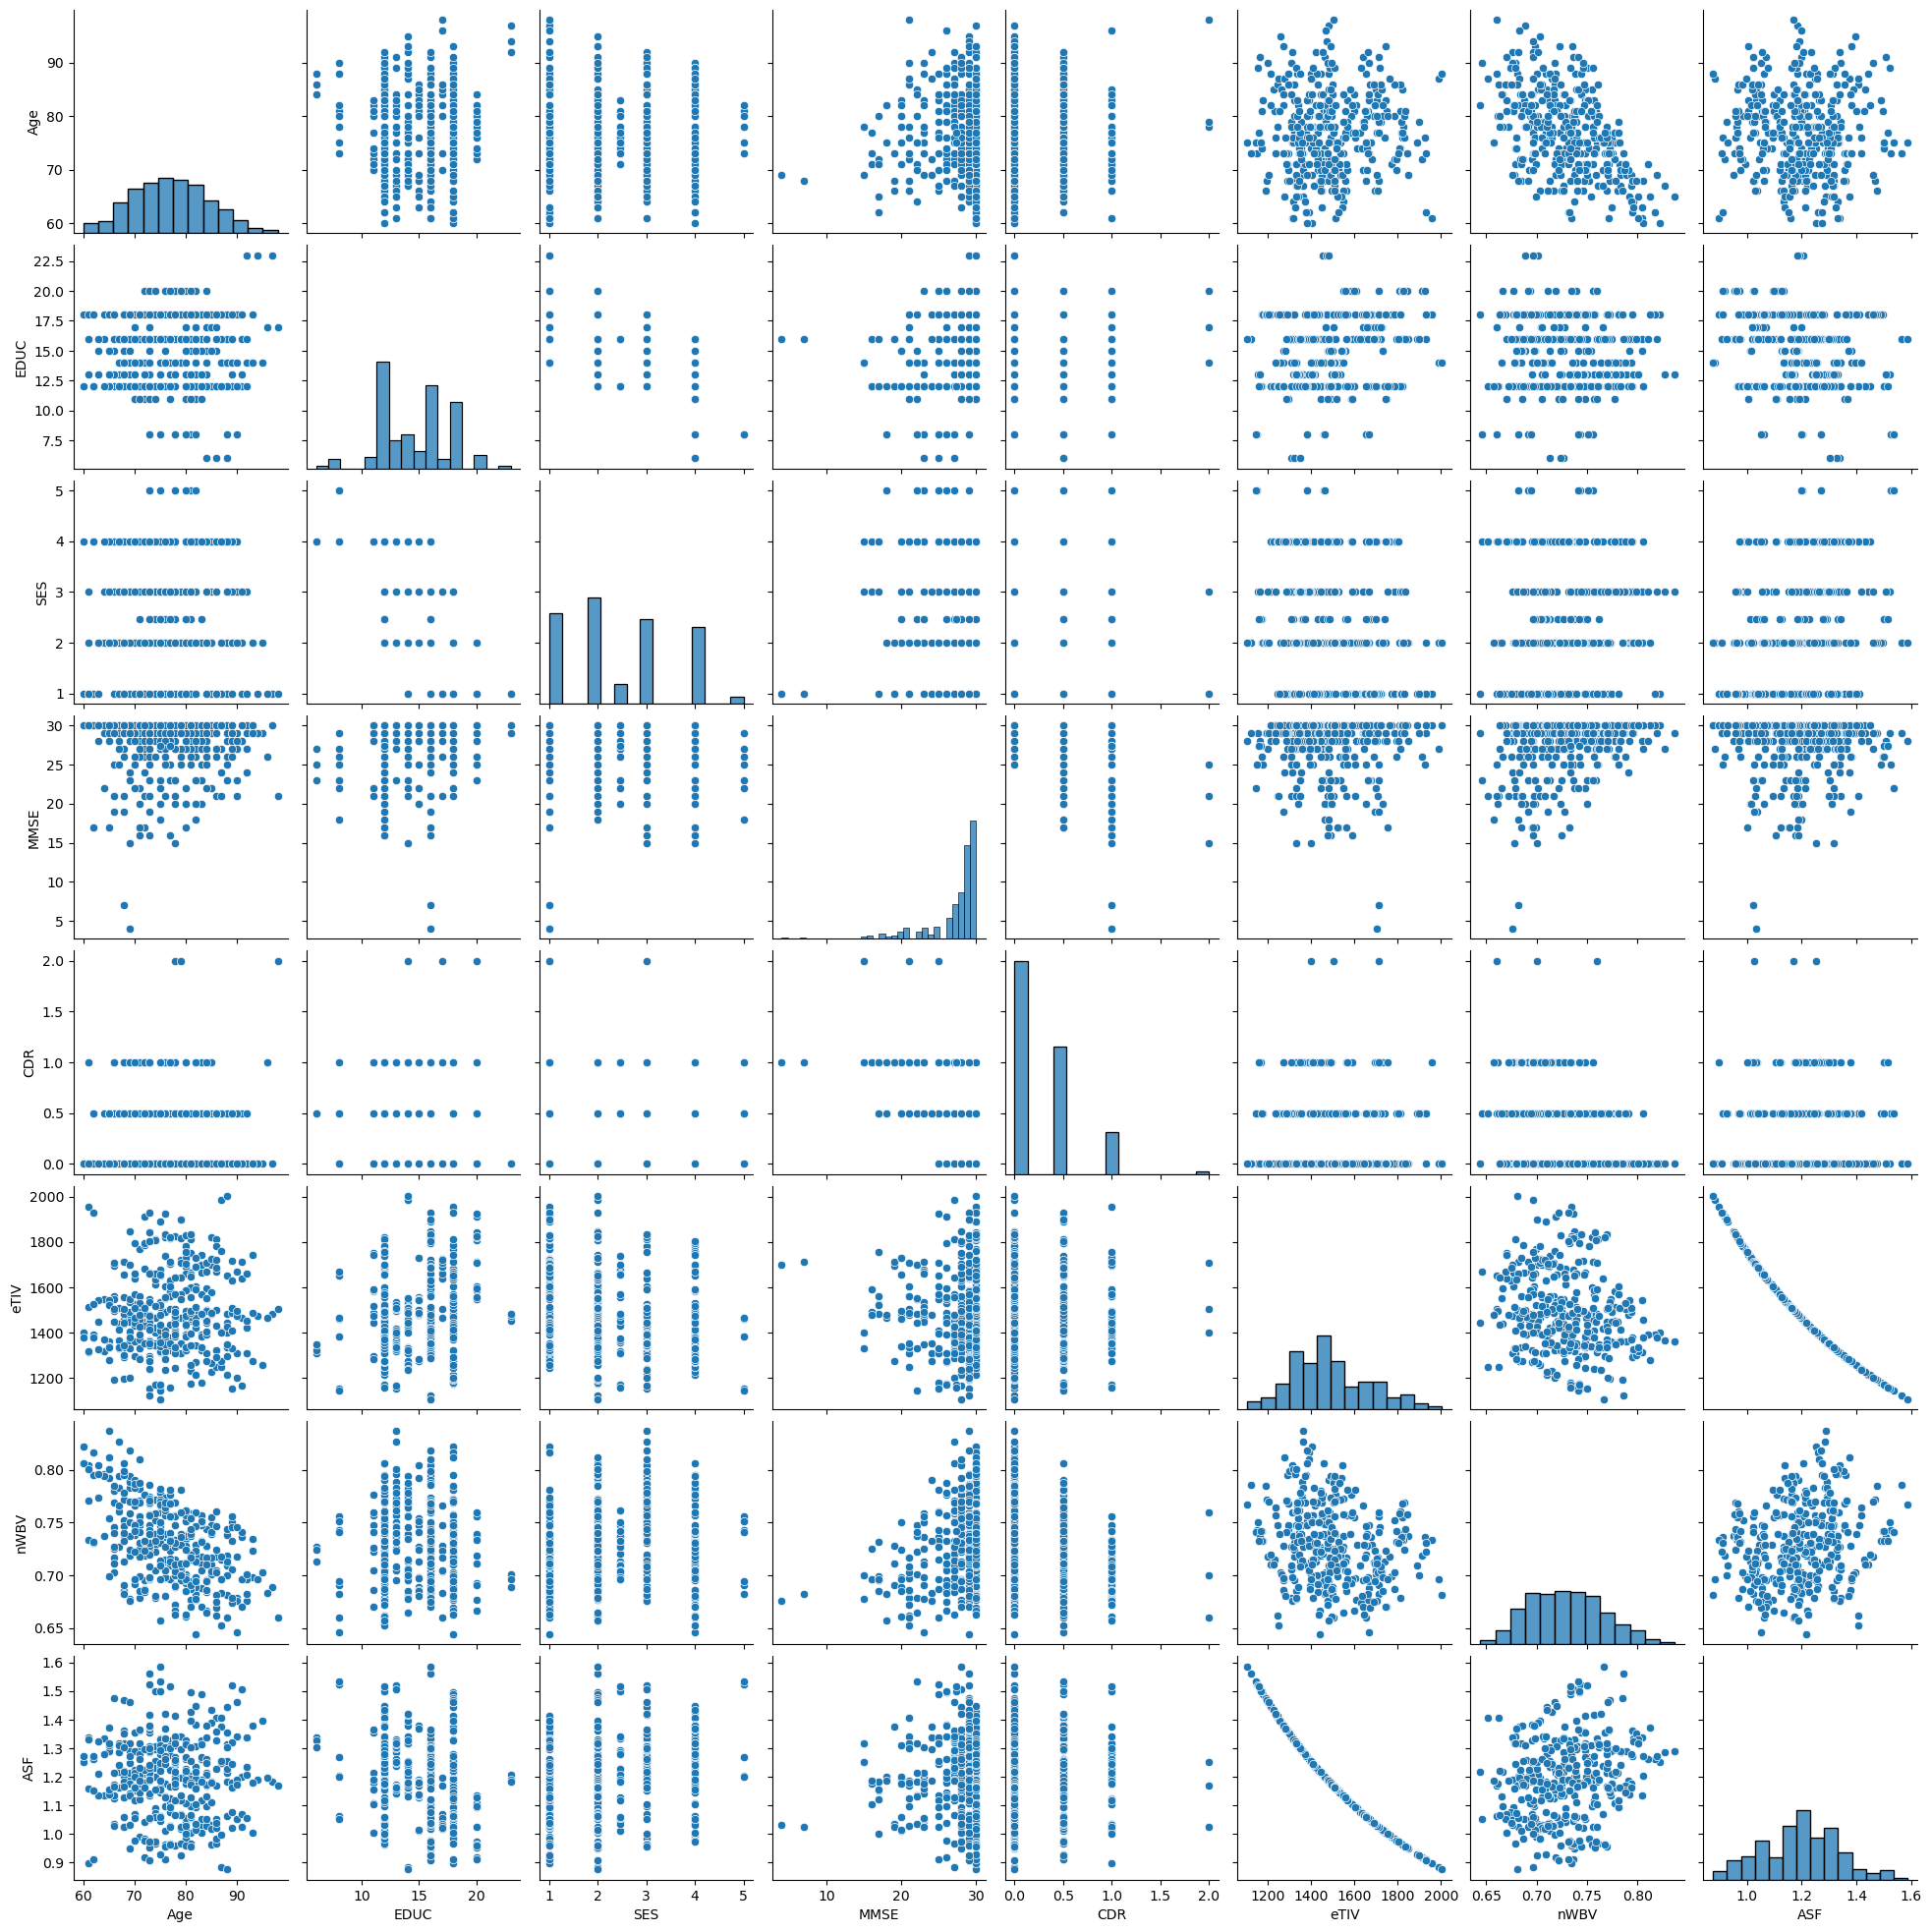

In [12]:
sns.pairplot(dt)
plt.show()

In [13]:
data = dt.drop(columns=["Group","M/F"])

<Axes: >

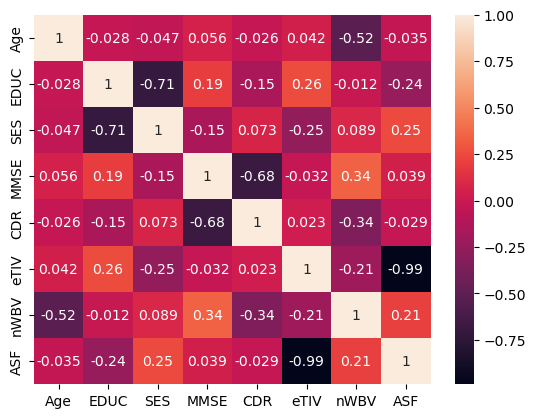

In [14]:
sns.heatmap(data.corr(), annot=True)

In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [16]:
# Kategorik veri için One-hot kodlama
ohe = OneHotEncoder(sparse=False)

In [17]:
M_F = dt["M/F"].values
M_F = ohe.fit_transform(M_F.reshape(-1, 1))
M_F = pd.DataFrame(M_F, columns=["M", "F"])
M_F.head()

C:\Users\cemil\anaconda3\envs\me\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,M,F
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [18]:
# ham veri
Group = ('Nondemented','Demented','Converted')

# dataframe yarat
Group_df = pd.DataFrame(dt, columns=['Group'])


In [19]:
# sütun tipini 'category' ye dönüştür

Group_df['Group'] = Group_df['Group'].astype('category')

In [20]:
# one-hot encoder nesnesi yarat

enc = OneHotEncoder(handle_unknown='ignore')

In [21]:
# kategoriler numerik veriler ata ve yeni bir sütun yarat

Group_df['Group_Kategorileri'] = Group_df['Group'].cat.codes
Group_df

,Group,Group_Kategorileri
0,Nondemented,2
1,Nondemented,2
2,Demented,1
3,Demented,1
4,Demented,1
...,...,...
368,Demented,1
369,Demented,1
370,Nondemented,2
371,Nondemented,2


In [22]:
enc_result = enc.fit_transform(Group_df[['Group']])

In [23]:
enc_df = pd.DataFrame(enc_result.toarray())
enc_df

,0,1,2
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
368,0.0,1.0,0.0
369,0.0,1.0,0.0
370,0.0,0.0,1.0
371,0.0,0.0,1.0


In [24]:
# yeni olan enc_df'i evlilik_df'e ekle

Group_df = Group_df.join(enc_df)


In [25]:
data_2 = pd.concat([Group_df,M_F], axis=1)

In [26]:
data_3 = pd.concat([data_2,data],axis=1)

In [27]:
data_3.head()

,Group,Group_Kategorileri,0,1,2,M,F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,2,0.0,0.0,1.0,0.0,1.0,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,0.0,0.0,1.0,0.0,1.0,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,Demented,1,0.0,1.0,0.0,0.0,1.0,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,Demented,1,0.0,1.0,0.0,0.0,1.0,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,Demented,1,0.0,1.0,0.0,0.0,1.0,80,12,2.460452,22.0,0.5,1698,0.701,1.034


In [28]:
df = data_3.drop(columns=["Group","Group_Kategorileri"])

In [29]:
df.head()

,0,1,2,M,F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0.0,0.0,1.0,0.0,1.0,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,0.0,0.0,1.0,0.0,1.0,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,0.0,1.0,0.0,0.0,1.0,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,0.0,1.0,0.0,0.0,1.0,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,0.0,1.0,0.0,0.0,1.0,80,12,2.460452,22.0,0.5,1698,0.701,1.034


<Axes: >

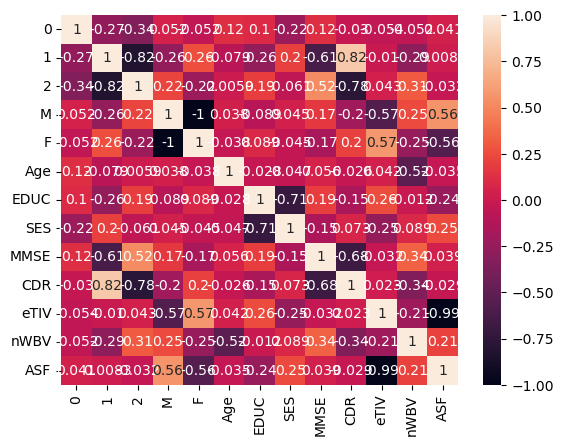

In [30]:
sns.heatmap(df.corr(), annot=True)

## model oluştur


In [31]:
# sklearn LinearRegression

from sklearn.linear_model import LinearRegression

In [32]:
# lineer regresyon nesnesini yarat

lr = LinearRegression()

In [33]:
X = df[['M','F','Age','EDUC','SES','MMSE','CDR','eTIV','nWBV','ASF']]
X.head()

,M,F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0.0,1.0,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,0.0,1.0,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,0.0,1.0,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,0.0,1.0,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,0.0,1.0,80,12,2.460452,22.0,0.5,1698,0.701,1.034


In [36]:
y = data_3[['Group_Kategorileri']]
y

,Group_Kategorileri
0,2
1,2
2,1
3,1
4,1
...,...
368,1
369,1
370,2
371,2


In [37]:
# önce input'un ve output'un boyutuna bakalım

print("X'in boyutu:", X.shape)
print("y'in boyutu:", y.shape)

X'in boyutu: (373, 10)
y'in boyutu: (373, 1)


In [38]:
# scikit-learn'den import

from sklearn.model_selection import train_test_split

In [39]:
# train data
# X_train, y_train

# test_data
# X_test, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [40]:
# regresyonu çalıştır -> fit
# fit -> öğrenme
# train data üzerinden

lr.fit(X_train, y_train)

LinearRegression()

In [41]:
# tahmin yap

y_pred = lr.predict(X_test)

In [42]:
# tahmini yazdır

y_pred

array([[ 1.4343092 ],
       [ 1.27700586],
       [ 1.84172902],
       [ 0.69046304],
       [ 1.13192961],
       [ 1.1402373 ],
       [ 1.62429137],
       [ 1.15326354],
       [ 1.46155404],
       [ 1.96923163],
       [ 1.86264943],
       [ 0.99801855],
       [ 1.47365747],
       [ 1.84192153],
       [ 1.00965857],
       [ 1.60643068],
       [ 1.1158418 ],
       [ 1.89997699],
       [ 0.69463089],
       [ 1.73461801],
       [ 0.87564869],
       [ 1.09827528],
       [ 1.91120765],
       [ 1.4702099 ],
       [ 1.55074103],
       [ 1.88664924],
       [ 0.96849859],
       [ 1.9154665 ],
       [ 0.92468799],
       [ 1.53534617],
       [ 1.67756265],
       [ 1.44329   ],
       [ 1.86068067],
       [ 1.86348917],
       [ 1.25271973],
       [ 1.11732191],
       [ 2.02251337],
       [ 1.29548601],
       [ 0.77467153],
       [ 1.52066663],
       [ 1.28619539],
       [ 1.32477654],
       [ 1.56744917],
       [ 1.82729967],
       [ 0.6073139 ],
       [ 1

In [307]:
# sklearn import

from sklearn.metrics import r2_score, mean_squared_error

In [308]:
# R^2 yi hesaplayalım
r_2 = r2_score(y_test, y_pred)

# R^2 % olarak yazdır
print('R^2 %:', r_2 * 100)

R^2 %: 47.948153106638436


In [309]:
# MSE -> RMSE
mse = mean_squared_error(y_test, y_pred)

# MSE'yi yazdır
print('MSE:', mse)

MSE: 0.17660448053104819


In [310]:
import statsmodels.api as sm

In [311]:
# statsmodels ile OLS (Ordinary Least Squares) çalıştır
# statsmodels ols fonksiyonu beta_0 için otomatik değer atamaz
# o yüzden beta_0 için 1 katsayısını bizim eklememiz lazım

X_train_ols = sm.add_constant(X_train)

In [312]:
X_train

,M,F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
26,0.0,1.0,77,16,3.000000,16.0,1.0,1590,0.696,1.104
173,1.0,0.0,73,12,4.000000,16.0,1.0,1478,0.696,1.188
35,1.0,0.0,92,14,1.000000,27.0,0.5,1423,0.696,1.234
260,1.0,0.0,77,12,3.000000,29.0,0.0,1344,0.740,1.306
39,0.0,1.0,72,20,1.000000,26.0,0.5,1911,0.719,0.919
...,...,...,...,...,...,...,...,...,...,...
343,0.0,1.0,70,16,4.000000,26.0,0.5,1796,0.742,0.977
359,0.0,1.0,73,12,2.460452,23.0,0.5,1661,0.698,1.056
323,0.0,1.0,78,12,2.460452,29.0,1.0,1569,0.704,1.119
280,0.0,1.0,75,18,2.000000,30.0,0.5,1651,0.737,1.063


In [313]:
X_train_ols

,const,M,F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
26,1.0,0.0,1.0,77,16,3.000000,16.0,1.0,1590,0.696,1.104
173,1.0,1.0,0.0,73,12,4.000000,16.0,1.0,1478,0.696,1.188
35,1.0,1.0,0.0,92,14,1.000000,27.0,0.5,1423,0.696,1.234
260,1.0,1.0,0.0,77,12,3.000000,29.0,0.0,1344,0.740,1.306
39,1.0,0.0,1.0,72,20,1.000000,26.0,0.5,1911,0.719,0.919
...,...,...,...,...,...,...,...,...,...,...,...
343,1.0,0.0,1.0,70,16,4.000000,26.0,0.5,1796,0.742,0.977
359,1.0,0.0,1.0,73,12,2.460452,23.0,0.5,1661,0.698,1.056
323,1.0,0.0,1.0,78,12,2.460452,29.0,1.0,1569,0.704,1.119
280,1.0,0.0,1.0,75,18,2.000000,30.0,0.5,1651,0.737,1.063


In [314]:
# statsmodels OLS modeli oluştur

sm_model = sm.OLS(y_train, X_train_ols)

In [315]:
# OLS modelinin sonuçlarını al

sonuc = sm_model.fit()

In [316]:
# OLS Özet tablosunu yazdır

print(sonuc.summary())

                            OLS Regression Results                            
Dep. Variable:     Group_Kategorileri   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     13.86
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           4.60e-18
Time:                        22:45:18   Log-Likelihood:                -221.56
No. Observations:                 261   AIC:                             463.1
Df Residuals:                     251   BIC:                             498.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4829      3.097     -1.124      0.2